In [1]:
# Load packages
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

CURRENT_DIR = os.getcwd()
PARENT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.append(PARENT_DIR)

from FDApy.irregular_functional import IrregularFunctionalData
from FDApy.local_polynomial import LocalPolynomial
from FDApy.bandwidth import Bandwidth
from FDApy.basis import *
from FDApy.plot import *
from FDApy.utils import *

# Generate IrregularFunctionalData 

In [48]:
argvals = list()
values = list()
for i in np.arange(1000):
    M = np.random.randint(275, 325)
    simu = Brownian(N=1, M=M, brownian_type='fractional')
    simu.new(x0=0, hurst=0.5)
    argvals.append(simu.obs_.argvals[0])
    noise = np.random.normal(0, 0.1, size=len(simu.obs_.argvals[0]))
    values.append(simu.obs_.values[0] + noise)

In [49]:
irr_fun = IrregularFunctionalData(argvals, values)
irr_fun

Irregular Functional data objects with 1000 observations of 1-dimensional support
argvals:
	Values in 0.0 ... 1.0.
values:
	Values in -3.9232303102063133 ... 3.4512746960830176.
There are 275 - 324 sampling points per observation.

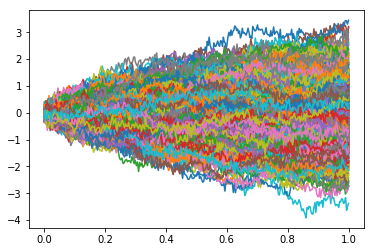

In [50]:
plot(irr_fun)
plt.show()

In [57]:
bandwidth = Bandwidth(t0=0.5, k0=14)
bandwidth.estimate_bandwidth(irr_fun)

In [58]:
bandwidth.H

0.7002734680939069

In [59]:
bandwidth.L

1.507527883324356

In [60]:
bandwidth.b[0]

0.015600635111711616

In [61]:
# Smooth the data
lp = LocalPolynomial(kernel="epanechnikov", bandwidth=bandwidth.b[0], degree=2)
lp.fit(irr_fun.argvals[0], irr_fun.values[0])

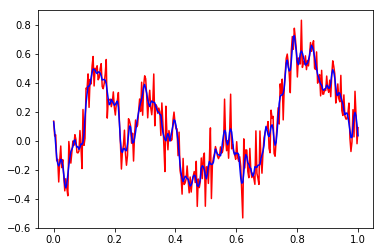

In [62]:
plt.plot(irr_fun.argvals[0], irr_fun.values[0], c='r')
plt.plot(irr_fun.argvals[0], lp.predict(irr_fun.argvals[0]), c='b')
plt.show()